## 02 - Sampling the Imaginary

#### Imports

In [186]:
# ruff: noqa: F405
from init_notebook import *

%config InlineBackend.figure_formats = ['svg']

#### Introduction

Suppose there is a blood test that correctly detects vampirism 95% of the time. In more precise and mathematical notation, $P(\text{positive test result}\mid\text{vampire})=0.95$. It’s a very accurate test, nearly always catching real vampires. It also make mistakes, though, in the form of **false positives**. One percent of the time, it incorrectly diagnoses normal people as vampires, $P(\text{positive test result}\mid\text{mortal})=0.01$. The final bit of information we are told is that vampires are rather rare, being only 0.1% of the population, implying $P(\text{vampire})=0.001$. Suppose now that someone tests positive for vampirism. What’s the probability that he or she is a bloodsucking immortal?

|                  | Vampire | Mortal  |
|------------------|---------|--------|
| Test Vampire     | 0.95    | 0.01   |
| Test Not Vampire | 0.05    | 0.99   |

$$P(\text{Vampire} \mid \text{Positive}) = \frac{P(\text{Positive} \mid \text{Vampire})P(\text{Vampire})}{P(\text{Positive})}$$

- $P(\text{Vampire}) = 0.001$
- $P(\text{Positive} \mid \text{Vampire}) = 0.95$
- $P(\text{Positive}) = P(\text{Positive} \mid \text{Vampire})P(\text{Vampire}) + P(\text{Positive} \mid \text{Mortal})P(\text{Mortal})$
- $P(\text{Positive} \mid \text{Morta}) = 0.01$ (False Positive)
- $P(\text{Positive}) = (0.95)(0.001) + (0.01)(0.999)$

That corresponds to an 8.7% chance that the suspect is actually a vampire.

In [187]:
pr_positive_vampire = 0.95
pr_positive_mortal = 0.01
pr_vampire = 0.001
pr_positive = pr_positive_vampire * pr_vampire + \
              pr_positive_mortal * (1 - pr_vampire)

pr_vampire_positive = pr_positive_vampire * pr_vampire / pr_positive

print(f'P(Vampire | Positive) = {pr_vampire_positive:.2%}')

P(Vampire | Positive) = 8.68%


Most people find this result counterintuitive. And it’s a very important result, because it mimics the structure of many realistic testing contexts, such as HIV and DNA testing, criminal profiling, and even statistical significance testing. Whenever the condition of interest is very rare, having a test that finds all the true cases is still no guarantee that a positive result carries much information at all. The reason is that **most positive results are false positives, even when all the true positives are detected correctly**.

Suppose that instead of reporting probabilities, as before, we are told the following:
1) In a population of 100,000 people, 100 of them are vampires.
2) Of the 100 who are vampires, 95 of them will test positive for vampirism.
3) Of the 99,900 mortals, 999 of them will test positive for vampirism.

If we test all 100,000 people, what proportion of those who test positive for vampirism actually are vampires? Now we can just count up the number of people who test positive: $95 +999 =1094$. Out of these 1094 positive tests, 95 of them are real vampires, so that implies:
$$P(\text{Vampire} \mid \text{Positive}) = \frac{95}{1094} \approx 0.087$$

It’s exactly the same answer as before, but without a seemingly arbitrary rule. The second presentation of the problem, using counts rather than probabilities, is often called the *frequency format* or *natural frequencies*. 

In this notebook we exploit the intuitive frequency format by taking the probability distributions and sampling from them to produce counts. The posterior distribution is a probability distribution. And like all probability distributions, we can imagine drawing samples from it. The sampled events in this case are parameter values. Most parameters have no exact empirical realization. The Bayesian formalism treats parameter distributions as relative plausibility, not as any physical random process. In any event, randomness is always a property of information, never of the real world. But inside the computer, parameters are just as empirical as the outcome of a coin flip or a die toss or an agricultural experiment. The posterior defines the expected frequency that different parameter values will appear, once we start plucking parameters out of it.

**Why statistics can’t save bad science**

The vampirism example has the same logical structure as many different **signal detection problems**: (1) There is some binary state that is hidden from us; (2) we observe an imperfect cue of the hidden state; (3) we (should) use Bayes’ theorem to logically deduce the impact of the cue on our uncertainty. 

Scientific inference is sometimes framed in similar terms: (1) An hypothesis is either true or false; (2) we get a statistical cue of the hypothesis’ falsity; (3) we (should) use Bayes’ theorem to logically deduce the impact of the cue on the status of the hypothesis. It’s the third step that is hardly ever done. But let’s consider a toy example. Suppose the probability of a positive finding, when an hypothesis is true, is $P(\text{sig}|\text{true})=0.95$. That’s the power of the test. Suppose that the probability of a positive finding, when an hypothesis is false, is $P(\text{sig}|\text{false})=0.05$. That’s the false-positive rate, like the 5% of conventional significance testing. Finally, we have to state the base rate at which hypotheses are true. Suppose for example that 1 in every 100 hypotheses turns out to be true. Then $P(\text{true})=0.01$. No one knows this value, but the history of science suggests it’s small.

Now compute the posterior:
$$P(\text{true} \mid \text{pos}) = \frac{P(\text{pos} \mid \text{true})P(\text{true})}{P(\text{pos})} = \frac{P(\text{pos} \mid \text{true})P(\text{true})}{P(\text{pos} \mid \text{true})P(\text{true}) + P(\text{pos} \mid \text{false})P(\text{false})}$$

Plug in the appropriate values, and the answer is approximately $P(\text{true}|\text{pos})=0.16$. So a positive finding corresponds to a 16% chance that the hypothesis is true. This is the same low base-rate phenomenon that applies in medical (and vampire) testing. You can shrink the false-positive rate to 1% and get this posterior probability up to 0.5, only as good as a coin flip. The most important thing to do is to improve the base rate, $P(\text{true})$, and that requires thinking, not testing.

In [188]:
pr_positive_true = 0.95 
pr_true = 0.01
pr_positive_false = 0.05
pr_positive = pr_positive_true * pr_true + pr_positive_false * (1 - pr_true)

pr_true_positive = (pr_positive_true * pr_true) / pr_positive

print(f'P(True | Positive) = {pr_true_positive:.2%}')

P(True | Positive) = 16.10%


Many are uncomfortable with integral calculus. Working with samples transforms a problem in calculus into a problem in data summary, into a frequency format problem. An integral in a typical Bayesian context is just the total probability in some interval. That can be a challenging calculus problem. But once you have samples from the probability distribution, it’s just a matter of counting values in the interval. An empirical attack on the posterior allows on to ask and answer more questions about the model, without relying upon a captive mathematician. For this reason, it is easier and more intuitive to work with samples from the posterior, than to work with probabilities and integrals directly.

Some of the most capable methods of computing the posterior produce nothing but samples. Many of these methods are variants of Markov chain Monte Carlo techniques.

#### Sampling from a Grid-Approximation Posterior

The below code computes the posterior for a model using grid approximation. Remember, the posterior here means the probability of $p$ conditional on the data.

In [189]:
def uniform_prior(grid_points):
    """
    Returns Uniform prior density

            Parameters:
                grid_points (numpy.array): Array of prior values

            Returns:
                density (numpy.array): Uniform density of prior values
    """
    return np.repeat(1, grid_points)

def binom_post_grid_approx(prior_func, grid_points=5, k=6, n=9):
    """
    Returns the grid approximation of posterior distribution with binomial likelihood.

            Parameters:
                    prior_func (function): A function that returns the likelihood of the prior
                    grid_points (int): Number of points in the prior grid
                    k (int): Number of successes
                    n (int): Number of tosses

            Returns:
                    p_grid (numpy.array): Array of prior values
                    likelihood (numpy.array): array of likelihood at each point in the grid
                    posterior (numpy.array): Likelihood (density) of prior values
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = prior_func(grid_points)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(k, n, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, likelihood, posterior

In [190]:
p_grid, _, posterior = binom_post_grid_approx(uniform_prior, grid_points=1_000, k=6, n=9)

# np.random.seed(10)
samples = np.random.choice(p_grid, size=10_000, replace=True, p=posterior)
samples

array([0.71971972, 0.76376376, 0.79379379, ..., 0.61561562, 0.70970971,
       0.55955956])

Now we wish to draw 10,000 samples from this posterior. Imagine the posterior is a bucket full of parameter values, numbers such as 0.1, 0.7, 0.5, 1, etc. Within the bucket, each value exists in proportion to its posterior probability, such that values near the peak are much more common than those in the tails. We’re going to scoop out 10,000 values from the bucket. Provided the bucket is well mixed, the resulting samples will have the same proportions as the exact posterior density. Therefore the individual values of $p$ will appear in our samples in proportion to the posterior plausibility of each value.

The workhorse here is `np.random.choice`, which randomly pulls values from a vector. The vector in this case is `p_grid`, the grid of parameter values. The probability of each value is given by `posterior`, which we computed just above.

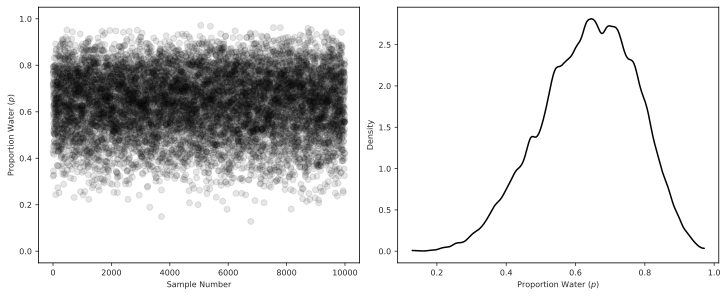

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(samples, 'ko', alpha=0.1)
ax[0].set_xlabel('Sample Number')
ax[0].set_ylabel('Proportion Water ($p$)')
ax[0].set_ylim(-0.05,1.05)
ax[0].spines[['right', 'top']].set_visible(True)
az.plot_kde(samples, plot_kwargs={'color': 'black', 'linestyle': '-'}, ax=ax[1])
ax[1].set_xlabel('Proportion Water ($p$)')
ax[1].set_ylabel('Density')
ax[1].spines[['right', 'top']].set_visible(True);

Sampling parameter values from the posterior distribution. Left: 10,000 samples from the posterior implied by the globe tossing data and model. Right: The density of samples (vertical) at each parameter value (horizontal).

In this plot, it’s as if you are flying over the posterior distribution, looking down on it. There are many more samples from the dense region near 0.6 and very few samples below 0.25. On the right, the plot shows the density estimate computed from these samples.

You can see that the estimated density is very similar to ideal posterior you computed via grid approximation. If you draw even more samples, maybe 1e5 or 1e6, the density estimate will get more and more similar to the ideal.

All you’ve done so far is crudely replicate the posterior density you had already computed. That isn’t of much value. But next it is time to use these samples to describe and understand the posterior. That is of great value.

#### Sampling to Summarize

Once your model produces a posterior distribution, the model’s work is done. But your work has just begun. It is necessary to summarize and interpret the posterior distribution. Exactly how it is summarized depends upon your purpose. But common questions include:

- How much posterior probability lies below some parameter value?
- How much posterior probability lies between two parameter values?
- Which parameter value marks the lower 5% of the posterior probability?
- Which range of parameter values contains 90% of the posterior probability?
- Which parameter value has highest posterior probability?

These simple questions can be usefully divided into questions about (1) intervals of **defined boundaries**, (2) questions about intervals of **defined probability mass**, and (3) questions about **point estimates**. We’ll see how to approach these questions using samples from the posterior.

##### Intervals of Defined Boundaries

Suppose I you are asked for the posterior probability that the proportion of water is less than 0.5. Using the grid-approximate posterior, you can just add up all of the probabilities, where the corresponding parameter value is less than 0.5:

In [192]:
# add up posterior probability where p < 0.5
np.sum(posterior[p_grid < 0.5])

0.17187458902022873

So about 17% of the posterior probability is below 0.5. Couldn’t be easier. But since grid approximation isn’t practical in general, it won’t always be so easy. Once there is more than one parameter in the posterior distribution, even this simple sum is no longer very simple.

Let’s see how to perform the same calculation, using samples from the posterior. This approach does generalize to complex models with many parameters, and so you can use it everywhere. All you have to do is similarly add up all of the samples below 0.5, but also divide the resulting count by the total number of samples. In other words, find the frequency of parameter values below 0.5:

In [193]:
np.sum(samples < 0.5) / 1e4

0.1675

And that’s nearly the same answer as the grid approximation provided, although your answer will not be exactly the same, because the exact samples you drew from the posterior will be different. This region is shown in the upper-left plot below. 

Using the same approach, you can ask how much posterior probability lies between 0.5 and 0.75:

In [194]:
np.sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.613

In [195]:
np.sum(posterior[(p_grid > 0.5) & (p_grid < 0.75)])

0.6045851774160315

So about 61% of the posterior probability lies between 0.5 and 0.75. This region is shown in the upper-right plot below.

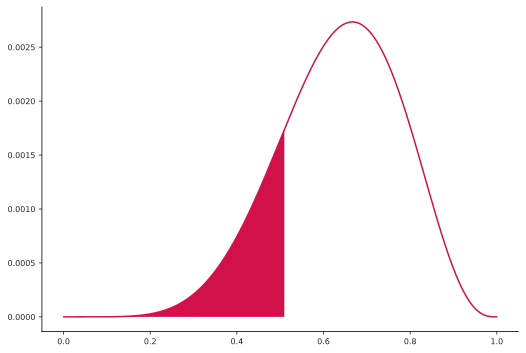

In [ ]:
plt.plot(p_grid, posterior)
ci_start, ci_end = 0, 0.51
ci_indices = (p_grid >= ci_start) & (p_grid <= ci_end)
plt.fill_between(p_grid[ci_indices], y1=0, y2=posterior[ci_indices])



In [210]:
(np.quantile(posterior, q=[0.1,0.9]))[0]

3.815429789222343e-07

In [221]:
np.quantile(posterior, q=0.8)

0.0022217508643582276

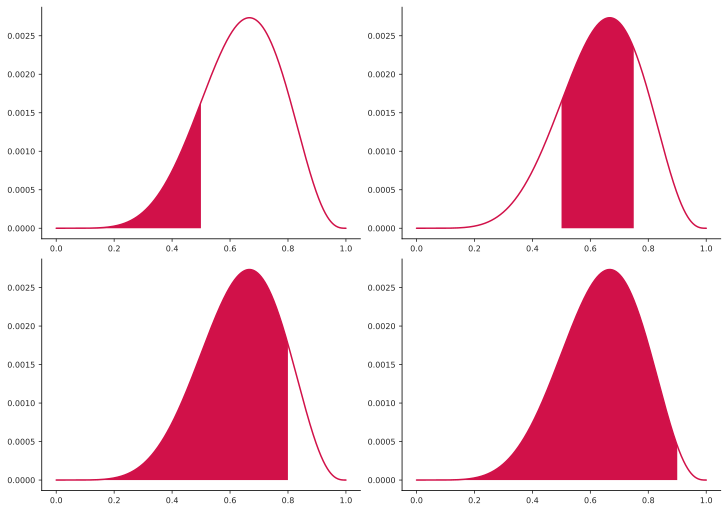

In [223]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
intervals = [(0, 0.5001), 
             (0.5, 0.7501), 
             (0, np.quantile(p_grid, q=0.8)), 
             (np.quantile(p_grid, q=[0.1,0.9]))]
for ii in range(4):
    ax = axs[ii // 2][ii % 2]
    ax.plot(p_grid, posterior)
    i_start, i_end = intervals[ii]
    i_indices = (p_grid >= i_start) & (p_grid <= i_end)
    ax.fill_between(p_grid[i_indices], y1=0, y2=posterior[i_indices])